# COMP 9517 Lab4

Written by: Borong Xu 

Environment:  
- Python 3.11
- OpenCV 4.10
- Matplotlib 3.9
- Numpy 2.1


### Library import

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Task1_path = 'COMP9517_25T1_Lab4_Images/'

## Load images

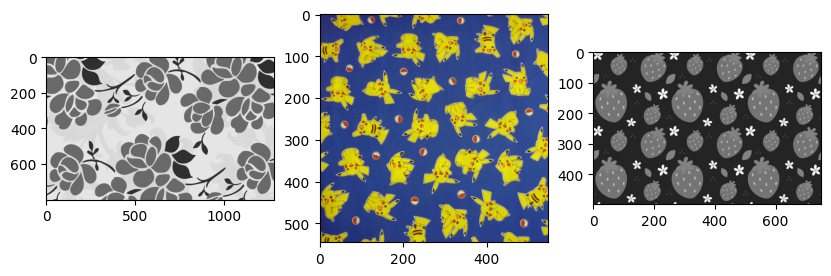

In [2]:
img1 = cv.imread(Task1_path + 'Leaves.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread(Task1_path + 'Pikachus.jpg', cv.IMREAD_COLOR)
img3 = cv.imread(Task1_path + 'Strawberries.jpg', cv.IMREAD_GRAYSCALE)


img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1) 
plt.imshow(img1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.show()

## Intensity histogram

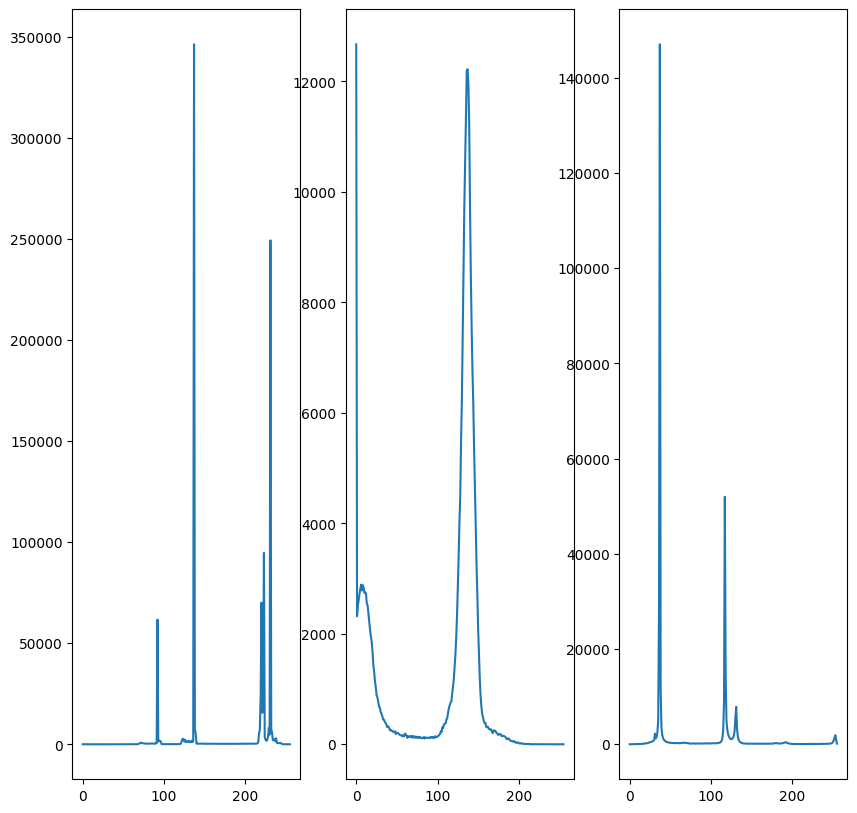

In [3]:
img1_hist = cv.calcHist([img1], [0], None, [256], [0, 256])
img2_hist = cv.calcHist([img2], [2], None, [256], [0, 256])
img3_hist = cv.calcHist([img3], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1) 
plt.plot(img1_hist)
plt.subplot(1, 3, 2)
plt.plot(img2_hist)
plt.subplot(1, 3, 3)
plt.plot(img3_hist)
plt.show()

## Binary operations



## Leaves segmentation


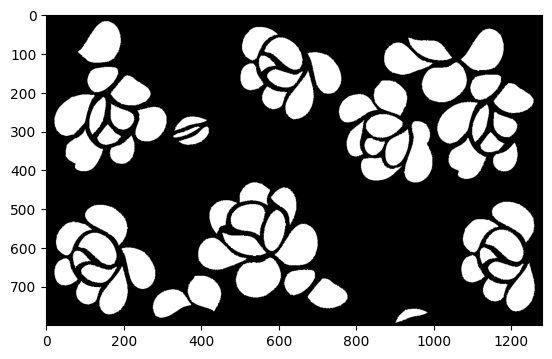

72

In [4]:
img1_seg = ((img1 > 135) & (img1 < 140)).astype(np.uint8) * 255

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
img1_close = cv.morphologyEx(img1_seg, cv.MORPH_CLOSE, kernel)

img1_shape = img1_close.shape
img1_output = img1_close.copy()
boarder = np.zeros((img1_shape[0], img1_shape[1]), dtype=np.uint8)
boarder[0, :] = 255
boarder[:, 0] = 255
boarder[:, -1] = 255
boarder[-1, :] = 255
img1_with_boarder = img1_close + boarder

analysis = cv.connectedComponentsWithStats(img1_with_boarder, 8, cv.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
img1_output = img1_close - (label_ids == label_ids[0, 0]) * 255
for i in range(totalLabels):
    if values[i, cv.CC_STAT_AREA] < 100:
        img1_output[label_ids == i] = 0

img1_output = (img1_output > 10).astype(np.uint8) * 255

analysis = cv.connectedComponentsWithStats(img1_output, 4, cv.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

img1_n = totalLabels - 1
# Background will be 0, so we need to subtract 1

plt.imshow(img1_output, cmap='gray')
plt.show()
img1_n

## Pikachu segmentation

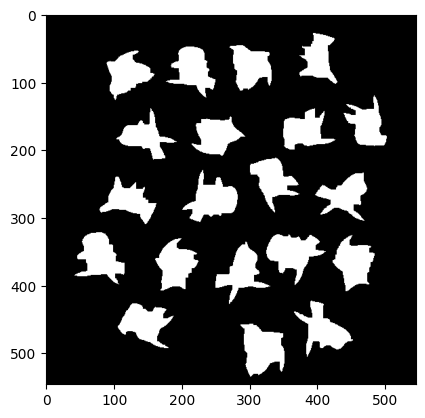

20

In [5]:
img2_seg = ((img2[:,:,2] < 50)).astype(np.uint8) * 255

kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
img2_close = cv.morphologyEx(img2_seg, cv.MORPH_CLOSE, kernel)

img2_shape = img2_close.shape
img2_output = img2_close.copy()
boarder = np.zeros((img2_shape[0], img2_shape[1]), dtype=np.uint8)
boarder[0, :] = 255
boarder[:, 0] = 255
boarder[:, -1] = 255
boarder[-1, :] = 255
img2_with_boarder = img2_close + boarder

analysis = cv.connectedComponentsWithStats(img2_with_boarder, 8, cv.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
img2_output = img2_close - (label_ids == label_ids[0, 0]) * 255
for i in range(totalLabels):
    if values[i, cv.CC_STAT_AREA] < 150:
        img2_output[label_ids == i] = 0

img2_output = (img2_output > 10).astype(np.uint8) * 255

analysis = cv.connectedComponentsWithStats(img2_output, 4, cv.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

img2_n = totalLabels - 1
# Background will be 0, so we need to subtract 1

plt.imshow(img2_output, cmap='gray')
plt.show()
img2_n

## Strawberries segmentation

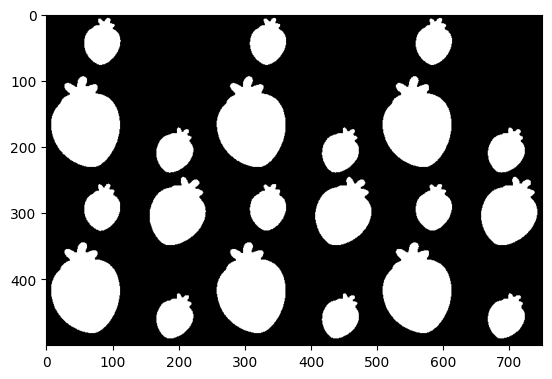

21

In [6]:
img3_seg = (img3 > 80).astype(np.uint8) * 255

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
img3_close = cv.morphologyEx(img3_seg, cv.MORPH_CLOSE, kernel)



img3_shape = img3_close.shape
img3_output = img3_close.copy()
boarder = np.zeros((img3_shape[0], img3_shape[1]), dtype=np.uint8)
boarder[0, :] = 255
boarder[:, 0] = 255
boarder[:, -1] = 255
boarder[-1, :] = 255
img3_with_boarder = img3_close + boarder

analysis = cv.connectedComponentsWithStats(img3_with_boarder, 8, cv.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
img3_output = img3_close - (label_ids == label_ids[0, 0]) * 255
for i in range(totalLabels):
    if values[i, cv.CC_STAT_AREA] < 1000:
        img3_output[label_ids == i] = 0

img3_output = (img3_output > 10).astype(np.uint8) * 255

analysis = cv.connectedComponentsWithStats(img3_output, 4, cv.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

img3_n = totalLabels - 1
# Background will be 0, so we need to subtract 1

plt.imshow(img3_output, cmap='gray')
plt.show()
img3_n

## Results

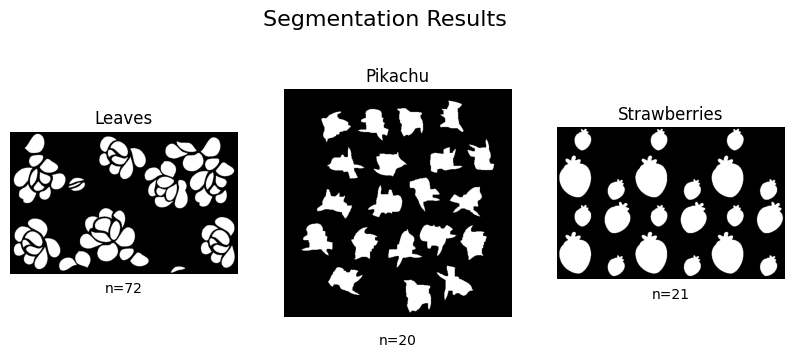

In [7]:
plt.figure(figsize=(10, 4))
plt.suptitle('Segmentation Results', fontsize=16)

plt.subplot(1, 3, 1)
plt.title('Leaves')
plt.imshow(img1_output, cmap='gray')
plt.text(0.5, -0.1, f'n={img1_n}', ha='center', va='center', transform=plt.gca().transAxes)
plt.axis('off')  

plt.subplot(1, 3, 2) 
plt.title('Pikachu')
plt.imshow(img2_output, cmap='gray')
plt.text(0.5, -0.1, f'n={img2_n}', ha='center', va='center', transform=plt.gca().transAxes)
plt.axis('off') 

plt.subplot(1, 3, 3)
plt.title('Strawberries') 
plt.imshow(img3_output, cmap='gray')
plt.text(0.5, -0.1, f'n={img3_n}', ha='center', va='center', transform=plt.gca().transAxes)
plt.axis('off')  

plt.subplots_adjust(hspace=0.5)  
plt.show()

### Reference  
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html  
https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html  
https://www.geeksforgeeks.org/python-opencv-connected-component-labeling-and-analysis/  
https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html

Copyright: This notebook is provided as part of the COMP9517 Computer Vision course at UNSW Sydney. This notebook can be used, modified and shared for educational purposes.

Borong Xu  
The Hong Kong University of Science and Technology  
Program of Computer Engineering  
https://boring180.github.io/